In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn import ensemble

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df_sup_cat1 = pd.read_csv('ML_feat_cat1.csv')

In [4]:
df_sup_cat1.shape

(485, 16)

In [5]:
df1_sup_cat1 = df_sup_cat1.sort_values(['yr','mon'])

In [6]:
df1_sup_cat1.head(10)

,Unnamed: 0,nodeid,mon,yr,total_sales_volume,total_sales_price,pm_total_sales_volume,pm_total_sales_price,l3m_total_sales_volume,l3m_total_sales_price,l12m_total_sales_volume,l12m_total_sales_price,numreviews_by_period,avgrating_by_period,numreviews,avgrating
92,92,3179,12.0,2009.0,5,39.75,0,0.00,0,0.00,0,0.00,0.0,0.0,2.0,4.5
95,95,3179,1.0,2010.0,0,0.00,5,39.75,5,39.75,5,39.75,0.0,0.0,2.0,4.5
68,68,3179,3.0,2010.0,1,7.95,0,0.00,5,39.75,5,39.75,0.0,0.0,2.0,4.5
382,382,8622832011,3.0,2010.0,54,9620.75,0,0.00,0,0.00,0,0.00,0.0,0.0,1.0,5.0
71,71,3179,4.0,2010.0,186,3030.33,1,7.95,1,7.95,6,47.70,0.0,0.0,2.0,4.5
389,389,8622832011,4.0,2010.0,188,33615.75,54,9620.75,54,9620.75,54,9620.75,0.0,0.0,1.0,5.0
74,74,3179,5.0,2010.0,131,1968.12,186,3030.33,187,3038.28,192,3078.03,0.0,0.0,2.0,4.5
396,396,8622832011,5.0,2010.0,152,27140.75,188,33615.75,242,43236.50,242,43236.50,0.0,0.0,1.0,5.0
76,76,3179,6.0,2010.0,222,4258.25,131,1968.12,318,5006.40,323,5046.15,0.0,0.0,2.0,4.5
403,403,8622832011,6.0,2010.0,191,32330.75,152,27140.75,394,70377.25,394,70377.25,0.0,0.0,1.0,5.0


In [7]:
df_sup_cat1.columns

Index([u'Unnamed: 0', u'nodeid', u'mon', u'yr', u'total_sales_volume',
       u'total_sales_price', u'pm_total_sales_volume', u'pm_total_sales_price',
       u'l3m_total_sales_volume', u'l3m_total_sales_price',
       u'l12m_total_sales_volume', u'l12m_total_sales_price',
       u'numreviews_by_period', u'avgrating_by_period', u'numreviews',
       u'avgrating'],
      dtype='object')

In [8]:
#df_sup_cat1[['Unnamed: 0']]
#df_sup_cat1.drop(df_sup_cat1.columns[[1, 2]], axis=1, inplace=True)

In [9]:
#df_sup_cat1.drop(['Unnamed: 0'],axis=1, inplace=True)
df2_sup_cat1= df1_sup_cat1.drop(['Unnamed: 0','nodeid'], axis=1)

In [10]:
y_data = df2_sup_cat1[['total_sales_volume']]
y_data.shape

(485, 1)

In [11]:
df2_sup_cat1.drop(['total_sales_volume'], axis=1,inplace = True)

In [12]:
df2_sup_cat1.head(2)

,mon,yr,total_sales_price,pm_total_sales_volume,pm_total_sales_price,l3m_total_sales_volume,l3m_total_sales_price,l12m_total_sales_volume,l12m_total_sales_price,numreviews_by_period,avgrating_by_period,numreviews,avgrating
92,12.0,2009.0,39.75,0,0.00,0,0.00,0,0.00,0.0,0.0,2.0,4.5
95,1.0,2010.0,0.00,5,39.75,5,39.75,5,39.75,0.0,0.0,2.0,4.5


/Users/sumangunnala/anaconda2/envs/py36/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


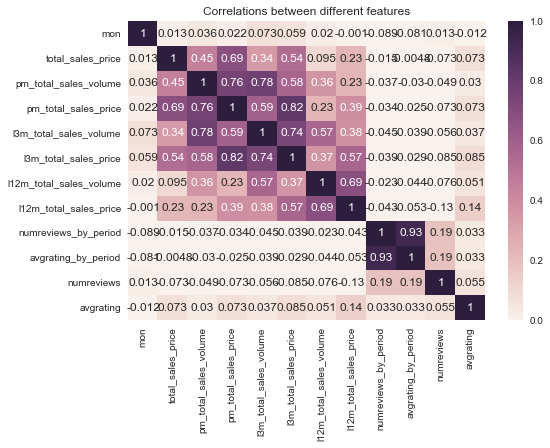

In [13]:
df_test = df2_sup_cat1.drop(['yr'], axis=1)
import seaborn as sns
correlations = df_test.corr()
plt.title("Correlations between different features")
#display(sns.heatmap(correlations, vmin=0, vmax=1, annot=True))
sns.heatmap(correlations, vmin=0, vmax=1, annot=True)
plt.show()

In [16]:
# converting pandas df to numpy array
df_test1_np = df2_sup_cat1.as_matrix()

In [17]:
df_test1_np.shape

(485, 13)

In [18]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [19]:
for train_index, test_index in tscv.split(df_test1_np):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df_test1_np[train_index], df_test1_np[test_index]
    #y_train, y_test = y_data[train_index], y_data[test_index]


('TRAIN:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]), 'TEST:', array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164]))
('TRAIN:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  2

In [20]:
 print X_train.shape,X_test.shape

(364, 13) (121, 13)


### Below code for grid search of gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
parameters = {'n_estimators':[20,50,80,100,200,300],'max_features':['auto','sqrt','log2'],
             'max_depth':[1,2,3,5,10], 'learning_rate' :[0.1,0.2],'min_samples_split': [5,10,20,50],
              'min_samples_leaf':[1,5,10,50]}
grid_search_GBR = GridSearchCV(model,parameters)

grid_search_GBR.fit(, )
print (grid_search_GBR.best_score_)

tuned_parameter_GBR = grid_search_GBR.best_params_
print tuned_parameter_GBR